# Tarea 3: Clasificacion II + Clustering

Felipe Bravo, Hernán Sarmiento, Aymé Arango, Alison Fernandez, Cinthia Mabel Sánchez, Juan-Pablo Silva

**Noviembre 2020**

## ============= Declaración de compromiso ético =============

Nosotros ****Nicolás Herrera, Sebastián Urbina y Samuel Sánchez**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos o tres personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalice el laboratorio, **genere un archivo HTML** usando jupyter (ver tutorial 2) y súbalo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura de la tarea

Esta tarea consiste en 3 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección introductoria para familiarizarse con métodos de clustering. Finalmente la tercera parte es un problema abierto de clasificación donde deberá usar todos los conocimientos que ha adquirido en el curso hasta este momento. Esos conocimientos incluyen exploración de datos, limpieza, entrenamiento de modelos, selección y evaluación.

# Parte 1: Teoría




**1.** Explique para qué se usan variables de holgura en el problema de optimización de la SVM. 

>Respuesta: Cuando no existe un hiperplano perfecto que permita ajustar a los datos, se tiene que los datos no son linealmente separables, entonces, con el fin de encontrar el mejor hiperplano posible, se realiza un balance entre el ancho del margen y el número de errores que ajusta a los datos, utilizando un modelo SVM Soft Margin. Esto último se realiza mediante la incorporación de variables de holgura a las restricciones, en donde, en la nueva función objetivo del problema de optimización, se realiza una penalización de acuerdo con esta variable de holgura.

**2.** John Doe, un consultor en minería de datos, argumenta lo siguiente: lo malo de las SVMs es que para que encuentren límites de decisión no lineales tengo que proyectarlas manualmente a más dimensiones con una función $\phi(x)$ que tengo que diseñar de manera manual. Esto hace que todo sea mucho más caro computacionalmente pues todas las operaciones las tengo que hacer sobre el espacio transformado. Discuta el argumento de John Doe.

>Respuesta:Al usar el enfoque de agregar más dimensionalidad se puede sufrir del problema de la maldición de la dimensionalidad, en donde las técnicas de minería de datos puede que no funcionen bien. Sin embargo, este problema se puede solucionar utilizando el "Truco de Kernel", en donde en vez de calcular una función para cada dimensión, se calcula la relación entre estas, lo cual disminuye considerablemente el costo computacional, lo cual permite que esta técnica de aumentar la dimesionalidad sea aplicable.



**3.** Usando un clasificador Naive Bayes con Laplace Smoothing entrenado con los datos de la tabla de más abajo, clasifique el siguiente ejemplo a la clase Evade: **[Refund= YES, Marital Status = Divorced]**.

Hint: Tiene que comparar P(Evade=Yes | datos) vs P(Evade=No|datos). Muestre todos sus cálculos.

Refund | Marital Status | Evade
--- | --- | ---
YES | Single | NO
NO | Married | NO
NO | Single | NO
YES | Married | NO
NO | Divorced | YES
NO | Married | NO
YES | Divorced | NO
NO | Single | YES
NO | Married | NO
NO | Single | YES

>Respuesta: 
> * ¿Cual es la probabilidad de que una instancia haya sido de cierta clase conociendo sus datos? $\rightarrow$ Predecir la clase $C$ que maximice $P(C|A_{1},A_{2},\ldots,A_{n})$
> * Por Bayes se tiene que:
> $P(C|A_{1},A_{2},\ldots,A_{n})=\frac{P(A_{1},A_{2},\ldots,A_{n}|C)P(C)}{P(A_{1},A_{2},\ldots,A_{n})}$
> * Como ${P(A_{1},A_{2},\ldots,A_{n})}$ es constante para todas las clases, basta maximizar solo $P(A_{1},A_{2},\ldots,A_{n}|C)P(C)$
> * Dado que cuando la clase esta dada, se asume independencia en los atributos
> $\rightarrow P(A_{1},A_{2},\ldots,A_{n}|C)=P(A_{1}|C)P(A_{2}|C)\ldots P(A_{n}|C)$
> * $\longrightarrow$ Maximizar $P(C)\prod_{i}P(A_{i}|C)$, en donde
>  - $P(C_{k})=\frac{count(C_{k})}{N}$
>  - $P(A_{i}=b|C_{k})=\frac{count(A_{ik}=b)+1}{count(C_{k})+values(A_{i})}$
> * En este ultimo, (para datos discretos), Laplace Smoothing generalizo bien el modelo, tal que $P(C|A_{1},A_{2},\ldots,A_{n})$ pudo irse a cero cuando $|A_{ik}|=0$. $values(A_{i})$ es la cantidad de categorias del atributo $A_{i}$

> * En este problema $\rightarrow$ `P(Evade=YES|datos) v/s P(Evade=NO|datos)`
> * P(Evade=Yes|datos)=P(Evade=Yes)P(Refund=Yes|Evade=Yes)P(State=Divorced|Evade=Yes)
>   - P(Evade=Yes)= $\frac{3}{10}$
>   - P(Refund=Yes|Evade=Yes)= $\frac{0+1}{3+2}=\frac{1}{5}$
>   - P(State=Divorced|Evade=Yes)= $\frac{1+1}{3+3}=\frac{1}{3}$
> * P(Evade=No|datos)=P(Evade=No)P(Refund=Yes|Evade=No)P(State=Divorced|Evade=No)
>   - P(Evade=No)= $\frac{7}{10}$
>   - P(Refund=Yes|Evade=No)= $\frac{3+1}{7+2}=\frac{4}{9}$
>   - P(State=Divorced|Evade=No)= $\frac{1+1}{7+3}=\frac{1}{5}$
> * Se tiene finalmente que:
>   - P(Evade=Yes|datos)= $\frac{3}{10}\frac{1}{5}\frac{1}{3}=\frac{3}{150}=0.020$
>   - P(Evade=No|datos)= $\frac{7}{10}\frac{4}{9}\frac{1}{5}=\frac{28}{450}=0.062$

> * Como P(Evade=No|datos)>P(Evade=Yes|datos), se tiene finalmente que para una instancia con los datos: `Refund=Yes, State=Divorced`, el clasificador le otorgara la clase de `Evade=No` al tener esta mayor probabilidad.


**4.** Explique cómo bisecting k-mean soluciona el problema de la inicialización de centroides de k-means.

>Respuesta: Con bisecting se busca encontrar mejores centroides iniciales para que se tengan los clusters esperados y que mejor describan a la data, para esto lo que se hace es dividir el conjunto de datos en dos cluster, luego se selecciona uno de estos dos y se divide hasta producir K clusters, utilizando el criterio de SSE más grande. Al tomar solo dos centroides iniciales, es más fácil y más probable encontrar un centroide que se ajuste mejor.

**5.** Explique cómo encontrar outliers en los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

>Respuesta: En el caso de K-Means, se puede utilizar la métrica de distancia SSE, en donde aquellos datos que estén muy alejados del centroide con respecto a los otros datos podría ser un outlier, estos outliers se van a encontrar en alguno de los clusters generados, puesto que así funciona el algorítmo de K-Means. Por otro lado, para el caso de Clustering Jerarquico Aglomerativo, va a depender de qué método se utiliza para calcular la distancia entre dos cluster o entre un punto y un claster, los cuáles pueden ser la distancia entre los dos puntos más cercanos de dos cluster, la distancia máxima entre los dos puntos más lejanos de un cluster, la distancia promedio o utilizando el método de ward. Entonces, para cada caso, se podría considerar como un outlier como a aquel dato que esté lejos del valor de la distancia a partir del método seleccionado, en donde, por ejemplo, para el caso de los mínimos, si un dato de un cluster diferente al dato más cercano al otro cluster está muy lejos del dato más cercano del otro cluster, se podría considerar a este dato como un outlier.

**6.** Describa una ventaja y desventaja de los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

>Respuesta:

* Clustering Jerarquico Aglomerativo -> Ventaja: No se debe suponer una cierta cantidad de cluters previamente, en donde el número de cluster debe ser menor a la cantidad de puntos que se tienen.
* Clustering Jerarquico Aglomerativo -> Desventaja: Una vez que se decide unir dos clusters no se pueden volver a separar.
* K-Means -> Ventaja: Se tiene un parámetro claro que se busca minimizar, el SSE.
* k-Means -> Desventaja: Si existen clusters de diferentes tamaños y densidades puede ser que K-Means no los detecte bien y lo que podría ocurrir que separe un cluster que no debería estar separado.


**7.** En DBSCAN el parametro `eps` es crucial para obtener buenos clusters. Explique una forma de encontar el valor de `eps`.

>Respuesta: Para determinar el valor de eps se debe analizar la distancia (k-dist) de un punto a su k-ésimo vecino más cercano, en donde k en general depende de la dimensión del set de datos. Entonces, cuando esta distancia aumenta considerablemente es cuando se puede detectar cuál podría ser el valor de eps, por lo que los puntos que están dentro de un mismo cluster tienen un k-dist pequeño, siempre y cuando el valor de k no sea más grande que el tamaño del cluster al que pertencen, por otro lado, aquellos puntos que no pertenezcan a un cluster tendrán un k-dist mayor.

**8.** Evaluar clusters no es una tarea fácil. Qué formas de evaluar clusters conoce? Nombre 3 formas de validación y describa cómo podría determinar si los cluters son buenos o malos usando cada una de las formas nombradas.

>Respuesta: Una forma de evaluar clusters es ver la cohesión presente en cada, es decir, mediante la suma de los errores cuadráticos, ver si la distancia entre los puntos de un cluster es menor que otro, en donde mientras menor sea mejor va a ser el cluster. Otra forma de evaluar cluster es midiendo la pureza de un cluster, para este caso se debe saber de antemano alguna categorización o etiqqueta de los puntos, dado que se ve el nivel en que un cluster contiene elementos de una clase, en donde mientras más elementos sean de una misma clase mejor va a ser el cluster. Por otro lado se encuentra la medida de entropía, la cual indica la cantidad de clases diferentes que tiene un cluster, en donde mientras menor sea este número mejor va a ser el cluster.

# Parte 2: Clustering

Para esta parte usaremos el dataset de cantidad de denuncias por 100 mil habitantes por tipo de delito desde el año 2001 al 2016 en Chile (Fuente: http://www.seguridadpublica.gov.cl/estadisticas/tasa-de-denuncias-y-detenciones/delitos-de-mayor-connotacion-social-series-de-datos-2001-2017/).

Ejecute el siguiete código para cargar el dataset:

In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/denuncias-2001-2016.txt", sep=" ")
dataframe

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
1,Arica,2001,1.6,370.3,NaN,9.5,NaN,107.2,16.4
2,Arica,2002,1.1,346.7,NaN,34.0,NaN,122.8,14.9
3,Arica,2003,1.6,460.1,464.4,52.8,172.2,196.2,15.5
4,Arica,2004,1.1,452.2,395.0,64.1,203.7,143.8,13.9
5,Arica,2005,0.0,421.8,287.8,58.4,144.2,144.7,7.5
...,...,...,...,...,...,...,...,...,...
5532,Peñaflor,2012,1.1,375.0,436.5,78.6,59.3,191.5,14.8
5533,Peñaflor,2013,0.0,370.0,408.1,107.6,77.4,213.0,14.6
5534,Peñaflor,2014,1.1,301.3,376.3,112.6,65.1,224.0,5.5
5535,Peñaflor,2015,0.0,321.6,334.7,111.9,73.9,199.9,7.6


Utilizaremos sólo los datos del 2006. Ejecute las siguientes líneas de código para filtrar los datos:

In [2]:
X = dataframe[dataframe["anio"] == 2006]
X = X.drop(columns=["comuna", "anio"])
X

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0
70,0.6,680.3,327.2,211.5,169.7,287.0,18.2
...,...,...,...,...,...,...,...
5462,2.8,359.0,451.3,44.0,27.0,293.8,5.7
5478,3.4,233.4,375.4,27.1,6.8,60.9,6.8
5494,3.4,332.7,492.3,23.8,20.4,71.3,3.4
5510,0.0,263.6,529.3,57.1,22.0,235.0,11.0


## K-Means

**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente un método que nos permita determinar cuántos clusters usar.

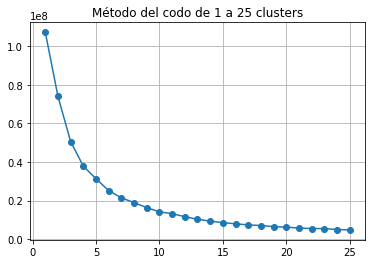

In [57]:
# Respuesta

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []

rs = 10
clusters = list(range(1, 26))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Método del codo de 1 a 25 clusters")
plt.grid(True)
plt.show()

**2.** Cuántos clusters propone usar para este dataset? Justifique su elección.

> Respuesta: Pese a no diferenciar un punto claro desde donde el error decrece de manera menos significativa, se aprecia que un valor optimo esta entre 4? y 6? clusters, por lo que se propone usar 4?, tal que si se eligieran más, posiblemente se estarian separando clusters ya existentes en clusters más pequeños.

> Para luego confirmar este valor, y tener un resultado mas confiable, se visualizaran los clusters en grafico de colores para distinguirlos, no sin antes reducir la dimensionalidad a 2.

**3.** Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.

In [77]:
###### Respuesta

kmeans = KMeans(n_clusters = 4, n_init = 20, max_iter = 300, random_state = rs).fit(X)
y_pred = kmeans.predict(X)
print(np.bincount(y_pred))

[249  91   4   2]


**4.** Al ejecutar el siguiente código varias veces, obtenemos resultados diferentes. Cómo podría evitar los resultados variables de K-means? Presente al menos 2 opciones para lograr esto. Puede implementarlo o describirlo.

> Respuesta: 
> 1. Para evitar la obtención de resultados diferentes en cada ejecución utilizamos el parámetro de _random_state_, que permite setear el mismo conjunto de valores aleatorios en cada ejecución
> 2. 

**5.** Ejecute el siguiente código que bajará la dimensionalidad de los datos de 7 a 2. Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters.

In [78]:
from sklearn.decomposition import PCA

new_X = PCA(n_components=2, random_state=0).fit_transform(X)

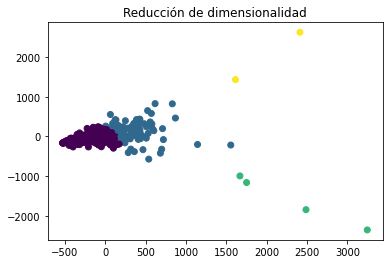

In [79]:
# Respuesta

plt.scatter(new_X[:,0],new_X[:,1], c=kmeans.labels_)
plt.title("Reducción de dimensionalidad")
plt.show()

## Clustering Jerárquico Aglomerativo

**1.** Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.

In [89]:
# Respuesta

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

complete = linkage(X, method = "complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")

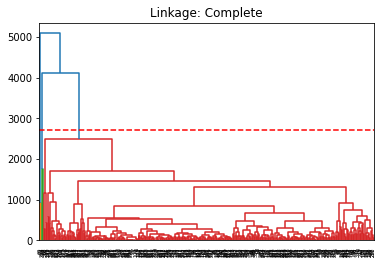

In [90]:
#Complete dendrogram
dendrogram(complete)
plt.title("Linkage: Complete")
#plt.axhline(y = 2700, color = "r", linestyle = "--")
plt.show()

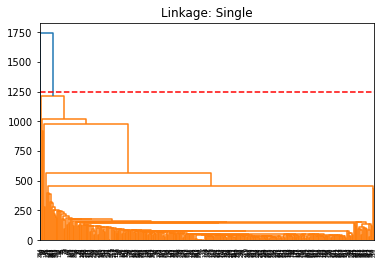

In [83]:
#Single dendrogram
dendrogram(single)
plt.title("Linkage: Single")
#plt.axhline(y = 1250, color = "r", linestyle = "--")
plt.show()

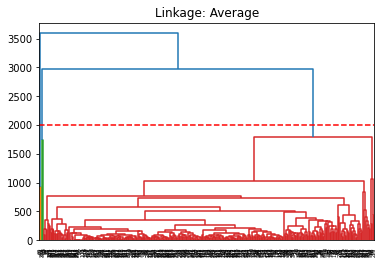

In [85]:
#Average dendrogram
dendrogram(average)
plt.title("Linkage: Average")
#plt.axhline(y = 2000, color = "r", linestyle = "--")
plt.show()

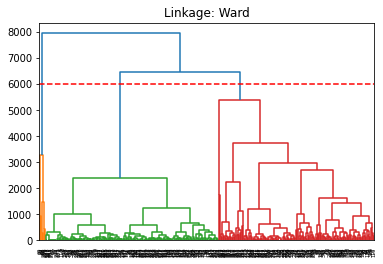

In [84]:
#Ward dendrogram
dendrogram(ward)
plt.title("Linkage: Ward")
#plt.axhline(y = 6000, color = "r", linestyle = "--")
plt.show()

**2.** Fijándose en el método `single`, a qué altura recomendaría cortar el árbol?

> Respuesta: Se recomienda cortar el arbol a una altura de 1250, punto donde se diferencian 2 clusters.

**3.** Ahora si miramos el método `ward`, cuántos clusters propone usar? A qué altura se debe cortar el arbol para obtener esa cantidad de clusters?

> Respuesta: Se propone usar 3 clusters (en el grafico: naranjo, verde y rojo), por lo que el arbol debe cortarse a una altura de 6000 para poder obtener esa cantidad.

**4.** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta **2.** y **3.** y liste la asignación de clusters para cada punto del dataset para `single` y `ward`. Cuántos clusters se generan para el método `single` cortando a la altura que propuso en la pregunta **2.**?

In [109]:
# Respuesta
h = 1250
n = 3
single_h = AgglomerativeClustering(n_clusters = None, linkage = "single", distance_threshold = h).fit(X)
ward_n = AgglomerativeClustering(n_clusters = n, linkage = "ward").fit(X)

print("Single:\nh = {} --> N° de clusters: {}".format(h, single_h.n_clusters_))

Single:
h = 1250 --> N° de clusters: 2


In [110]:
print("Single labels:\n",single_h.labels_)
print("Ward labels:\n",ward_n.labels_)

Single labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Ward labels:
 [0 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 2 2 2 2 0 0 2 2 0 2 2 2
 0 2 2 2 2 2 2 0 0 0 2 2 0 0 0 0 2 2 2 0 2 0 2 1 2 0 2 2 2 0 1 1 1 1 0 0 0
 0 2 2 2 0 0 0 0 0 2 0 2 0 0 2 0 0 2 2 0 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 0 0 0 0 0 2 2 0 2 2 2 0 2 2 0 2 0 0

In [111]:
# # Respuesta
# h = 1250
# n = 6

# single_h = AgglomerativeClustering(n_clusters = None, linkage = "single", distance_threshold = h).fit(X)
# print("Single, h = {} \n\t N° de clusters: {}".format(h, single_h.n_clusters_))
# ward_n = AgglomerativeClustering(n_clusters = n, linkage = "ward").fit(X)
# print("Ward, n = {} \n\t N° de clusters: {}".format(n, ward_n.n_clusters_))

**5.** Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para obtener esta información para los métodos `single` y `ward`.

In [112]:
# Respuesta
labels_single = np.bincount(single_h.labels_)
print("Single:")
for i, k in enumerate(labels_single):
    print("\tCluster {} -> n = {}".format(i, k))
    
labels_ward = np.bincount(ward_n.labels_)
print("Ward:")
for i, k in enumerate(labels_ward):
    print("\tCluster {} -> n = {}".format(i, k))

Single:
	Cluster 0 -> n = 345
	Cluster 1 -> n = 1
Ward:
	Cluster 0 -> n = 161
	Cluster 1 -> n = 6
	Cluster 2 -> n = 179


**6.** Usando el dataset con dimensiones reducidas generado en la Parte 1, pregunta 5: `new_X`, grafique los datos y pinte los datos con su asignacion de cluster para los métodos `complete` y `ward` para tener una representación visual de los clusters.

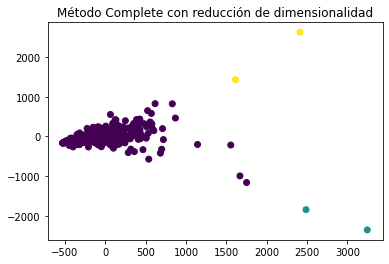

In [117]:
# Respuesta
complete_n =  AgglomerativeClustering(n_clusters = None, linkage = "complete", distance_threshold = 2700).fit(X)
plt.scatter(new_X[:,0], new_X[:,1], c = complete_n.labels_)
plt.title("Método Complete con reducción de dimensionalidad")
plt.show()

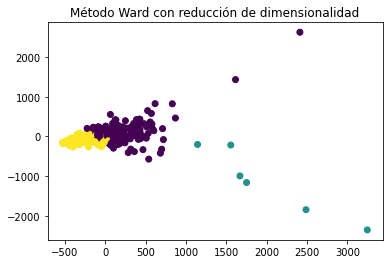

In [119]:
plt.scatter(new_X[:,0], new_X[:,1], c = ward_n.labels_)
plt.title("Método Ward con reducción de dimensionalidad")
plt.show()

# Parte 3: Problema Abierto

En esta pregunta usted deberá practicar un proceso reducido de minería de datos. Con el conjunto de datos que le daremos a continuación, usted deberá hacer una exploración de datos, aplicar las técnicas correspondientes de pre procesamiento de datos respecto a lo que encuentre y entrenar modelos de clasificación. Finalmente deberá evaluar los modelos que entrenó y justificar la elección de alguno de ellos.

Ejecute el siguiente código para cargar los datos que usaremos en esta parte. Los datos se encuentran en el archivo `movies.csv` adjunto en el zip.

**Estamos interesados en predecir la variable `imdb_score` a partir de los demas datos.** `imdb_score` es un entero y puede considerarlo como un variable categórica.

In [157]:
import seaborn as sns
import pandas as pd 
import numpy as np
data_file = "movies.csv"

movies = pd.read_csv(data_file)
movies.head()

,movie_title,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,color,director_name,director_facebook_likes,actor_1_name,...,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,language,country,content_rating,budget,aspect_ratio
0,Avatar,8,2009.0,886204,723.0,3054.0,Color,James Cameron,0.0,CCH Pounder,...,855.0,4834,33000,178.0,760505847.0,English,USA,PG-13,237000000.0,1.78
1,Pirates of the Caribbean: At World's End,7,2007.0,471220,302.0,1238.0,Color,Gore Verbinski,563.0,Johnny Depp,...,1000.0,48350,0,169.0,309404152.0,English,USA,PG-13,300000000.0,2.35
2,Spectre,7,2015.0,275868,602.0,994.0,Color,Sam Mendes,0.0,Christoph Waltz,...,161.0,11700,85000,148.0,200074175.0,English,UK,PG-13,245000000.0,2.35
3,The Dark Knight Rises,8,2012.0,1144337,813.0,2701.0,Color,Christopher Nolan,22000.0,Tom Hardy,...,23000.0,106759,164000,164.0,448130642.0,English,USA,PG-13,250000000.0,2.35
4,Star Wars: Episode VII - The Force Awakens ...,7,NaN,8,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,...,NaN,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploración de datos

**1.** Explore el dataset y de una descripción del dataset. Algunos puntos que puede tocar son el número de datos en el dataset, número de features, tipos de cada features y rangos, datos erroneos, etc.
Aplique el preprocesamiento necesario tal que los datos queden usables para los modelos de clasificación.

Nota: Como la parte de exploración puede ser tan compleja y detallada como uno quiera, tendremos una pauta con lo mínimo que uno debería hacer en un dataset. Consideraremos análisis más detallados como un bonus a esta u otras tareas.

Como una guía para encaminar la exploración, puede considerar los siguientes hints.

**Hints generales:**
* Los datos no vienen limpios y tienen varios problemas que usted sabe como solucionar.
* Qué tipos de datos tiene cada columna?
* Cómo se relacionan las features?

**Hints para bonus:** (no todos los hints corresponden a un puro análisis o procesamiento que pueden hacer sobre los datos, 2 hints pueden corresponden a la misma recomendación)
* Hay features (categóricas) que no aportan información, qué análisis le serviría para ver cómo impactan en el score?
* Revise los nombres de actores y directores.
* Algunas features tienen outliers, encuéntrelos y limpie el dataset. Recuerde el boxplot.
* Qué pasa si hay features extremadamente relacionadas entre sí?
* Temporalmente, son todos los datos representativos al escenario actual?
* Considere el siguiente código y vea si le sirve para algún tipo de análisis:
```python
feature = "..."
# esto cuenta las ocurrencias de cada valor en 'feature'
count = data[feature].value_counts()
# esto calcula el score promedio por cada valor del 'feature'
avg_score = data.groupby(feature)["imdb_score"].mean()
# los juntamos en un mismo dataframe
count.to_frame().join(avg_score)
```


### Respuesta.

In [170]:
print("Cantidad de instancias:", movies.shape[0])
print("Cantidad de atributos:", movies.shape[1])

Cantidad de instancias: 5043
Cantidad de atributos: 24


Contamos con 5043 filas con 24 atributos.

El detalle de los 24 atributos se puede ver a continuación:

In [183]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   imdb_score                 5043 non-null   int64  
 2   title_year                 4935 non-null   float64
 3   num_voted_users            5043 non-null   int64  
 4   num_critic_for_reviews     4993 non-null   float64
 5   num_user_for_reviews       5022 non-null   float64
 6   color                      5024 non-null   object 
 7   director_name              4939 non-null   object 
 8   director_facebook_likes    4939 non-null   float64
 9   actor_1_name               5036 non-null   object 
 10  actor_1_facebook_likes     5036 non-null   float64
 11  actor_2_name               5030 non-null   object 
 12  actor_2_facebook_likes     5030 non-null   float64
 13  actor_3_name               5020 non-null   objec

Si revisamos la cantidad de valores nulos por feature se tiene lo siguiente:

In [184]:
movies.isnull().sum()

movie_title                    0
imdb_score                     0
title_year                   108
num_voted_users                0
num_critic_for_reviews        50
num_user_for_reviews          21
color                         19
director_name                104
director_facebook_likes      104
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
duration                      15
gross                        884
language                      12
country                        5
content_rating               303
budget                       492
aspect_ratio                 329
dtype: int64

In [186]:
#Eliminamos los valores nulos
movies = movies.dropna()
movies.isnull().sum().sum()

0

Viendo la cantidad de valores duplicados...

In [187]:
movies.duplicated().value_counts() 

False    3742
True       33
dtype: int64

In [188]:
#Borramos los datos duplicados
movies = movies.drop_duplicates()
movies.duplicated().value_counts() 

False    3742
dtype: int64

Si ahora revisamos la cantidad de valores únicos por feature

In [189]:
movies.nunique()

movie_title                  3674
imdb_score                      8
title_year                     74
num_voted_users              3693
num_critic_for_reviews        527
num_user_for_reviews          942
color                           2
director_name                1670
director_facebook_likes       395
actor_1_name                 1439
actor_1_facebook_likes        717
actor_2_name                 2203
actor_2_facebook_likes        857
actor_3_name                 2600
actor_3_facebook_likes        882
cast_total_facebook_likes    3257
movie_facebook_likes          660
duration                      152
gross                        3657
language                       34
country                        45
content_rating                 12
budget                        361
aspect_ratio                   18
dtype: int64

Color no parece aportar información interesante, revisemos cuántas películas hay por categoría de color

In [200]:
movies["color"].value_counts()

Color               3619
 Black and White     123
Name: color, dtype: int64

Si revisamos la estadística descriptiva de los datos limpios se tiene:

In [201]:
movies.describe()

,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,budget,aspect_ratio
count,3742.000000,3742.000000,3.742000e+03,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3.742000e+03,3.742000e+03,3742.000000
mean,6.465794,2003.013629,1.052270e+05,166.637627,334.862640,805.915286,7709.319081,2001.559327,762.443079,11448.166221,9324.955906,110.235703,5.236814e+07,4.610755e+07,2.111058
std,1.099576,9.893395,1.515840e+05,123.663224,410.880079,3069.301059,15526.036661,4521.216677,1864.550647,19076.850481,21536.906438,22.681529,6.982355e+07,2.264059e+08,0.353447
min,2.000000,1927.000000,2.200000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,1.620000e+02,2.180000e+02,1.180000
25%,6.000000,1999.000000,1.924800e+04,76.000000,109.000000,11.000000,742.000000,380.000000,192.000000,1898.250000,0.000000,96.000000,8.058288e+06,1.000000e+07,1.850000
50%,7.000000,2005.000000,5.355750e+04,138.000000,209.000000,62.000000,1000.000000,682.500000,434.000000,3997.500000,227.000000,106.000000,2.998654e+07,2.500000e+07,2.350000
75%,7.000000,2010.000000,1.279002e+05,224.000000,397.750000,234.000000,13000.000000,975.000000,690.000000,16182.750000,11000.000000,120.000000,6.680402e+07,5.000000e+07,2.350000
max,9.000000,2016.000000,1.689764e+06,813.000000,5060.000000,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,330.000000,7.605058e+08,1.221550e+10,16.000000


Sería interesante ver un boxplot de el año de las películas...

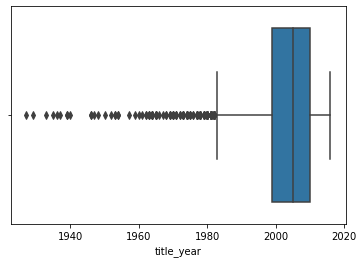

In [210]:
sns.boxplot(x = "title_year", data = movies);

Bastantes *outliers*, parece razonable filtrar películas despúes de 1980

In [226]:
mov_1980 = movies[movies["title_year"]>1980]

Si vemos la correlación entre las features se tiene:

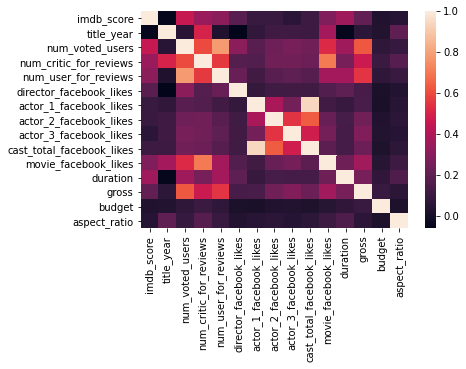

In [227]:
sns.heatmap(mov_1980.corr());

Se puede observar bastante correlación entre *num_users_for_reviews* y *num_voted_users*, *cast_total_Facebook_likes* y *actor_1_facebook_likes*

## Entrenamiento y Evaluación (Incompleto)

**2.** Escoja 2 modelos que hayan visto dentro del curso y entrénelos sobre los datos trabajados en la parte anterior. Recuerde aplicar buenas prácticas de entrenamiento vistas en clases y aplicadas en la tarea anterior. Evalúe los modelos en base a métricas vistas en el curso. Puede hacer gráficos o generar tablas para analizar y comparar los modelos.

In [443]:
scores = mov_1980.imdb_score.unique()
scores.sort()
print("Valores distintos de imbd_score:", scores)
for i in scores:
    print("Instancias del score {}: {}".format(i,len(mov_1980[mov_1980["imdb_score"]==i])))

Valores distintos de imbd_score: [2 3 4 5 6 7 8 9]
Instancias del score 2: 14
Instancias del score 3: 30
Instancias del score 4: 132
Instancias del score 5: 391
Instancias del score 6: 1267
Instancias del score 7: 1234
Instancias del score 8: 548
Instancias del score 9: 20


In [459]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#tup = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
tup = [1,2,3,4,5,8,10,12,14,15,16,17,18,22,23] # Solo atributos numericos?
data = mov_1980.iloc[:,tup]

Se dividira el dataset en 70% para entrenar (training set) y 30% para testear (testing set).

In [460]:
from sklearn.model_selection import train_test_split 

data_train, data_test, y_train, y_test = train_test_split(data, data["imdb_score"], test_size=0.3, random_state = 30, stratify=data["imdb_score"])

La proporcion de clases del set de entrenamiento es:

In [461]:
print("Distribucion de clases original")
dist_class = y_train.value_counts()
dist_class

Distribucion de clases original


6    887
7    864
8    383
5    274
4     92
3     21
9     14
2     10
Name: imdb_score, dtype: int64

Se aplica Oversampling para balancear las clases. **REVISAR: Es necesario el oversampling?**

In [464]:
import numpy as np

print("Distribución de clases usando Oversampling")
print()

data_train = data_train.reset_index(drop=True)
data_oversampled = data_train
# oversampling sobre cada score por debajo del maximo
for k, v in dist_class.items():
    if k==6:
        continue
    idx = np.random.choice(data_train[data_train["imdb_score"] == k].index, size=887-v)
    data_oversampled = pd.concat([data_oversampled, data_train.iloc[idx]])
print(data_oversampled["imdb_score"].value_counts())

Distribución de clases usando Oversampling

7    887
3    887
6    887
2    887
9    887
5    887
8    887
4    887
Name: imdb_score, dtype: int64


Se preparan los datos para ser compatibles con sklearn:

In [479]:
X_test = data_test[data_train.columns[1:]] 
y_test = data_test[data_train.columns[0]]

X_over = data_train[data_train.columns[1:]]
y_over = data_train[data_train.columns[0]]

Se ejecutan los tres clasificadores: Arbol de decision

In [481]:
#from sklearn.model_selection import GridSearchCV
#Configure tuned_parameters
#tuned_parameters_knn = {'n_neighbors': [1, 3, 5, 10], 
#                    'weights': ['uniform','distance']}
#tuned_parameters_dtree = {'criterion': ['gini','entropy'], 
#                    'max_depth': [2,5,10]}
#
#set scoring metric
#score_knn = 'precision' 
#score_dtree = 'f1'

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=20))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]

results = {}
for name, clf in classifiers:
    clf.fit(X_over, y_over) 
    y_pred = clf.predict(X_test) 
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print(classification_report(y_test, y_pred)) 
    print("----------------\n\n")  


----------------
Resultados para clasificador:  Base Dummy
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         9
           4       0.07      0.07      0.07        40
           5       0.13      0.13      0.13       117
           6       0.36      0.37      0.36       380
           7       0.32      0.30      0.31       370
           8       0.14      0.15      0.15       165
           9       0.00      0.00      0.00         6

    accuracy                           0.27      1091
   macro avg       0.13      0.13      0.13      1091
weighted avg       0.27      0.27      0.27      1091

----------------


----------------
Resultados para clasificador:  Decision Tree
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00   

c:\users\sasan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sasan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------
Resultados para clasificador:  Support Vector Machines
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00       117
           6       0.43      0.62      0.50       380
           7       0.38      0.55      0.45       370
           8       0.55      0.04      0.07       165
           9       0.00      0.00      0.00         6

    accuracy                           0.41      1091
   macro avg       0.17      0.15      0.13      1091
weighted avg       0.36      0.41      0.34      1091

----------------




c:\users\sasan\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusiones

**3.** Si este fuera un estudio encargado a usted por alguna empresa o cliente, basándose en los análisis que hizo anteriormente, qué conclusiones reportaría? Qué modelo propondría que fuera implementado en el producto del cliente? Por qué?

>Respuesta: